In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split   # to split the data
from sklearn.linear_model import LogisticRegression    # for logistic regression
from sklearn import metrics                            # to create confusion matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score


In [2]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# Create a custom function for data transformation

features = ['datetime',
            'latitude',
            'longitude',
            'absoluteAltitude',
            'magneticHeading',
            'trueHeading',
            'groundSpeed',
            'trueAirspeed',
            'pitch',
            'roll',
            'yaw',
            'angleOfAttack',
            'flightPathAngle',
            'verticalFlightPathAngle',
            'horizontalFlightPathAngle',
            'rollAcceleration',
            'pitchAcceleration',
            'yawAcceleration',
            'e1N1ng',
            'e2N1ng',
            'e1N2nf',
            'e2N2nf',
            'mainRotorRpm',
            'tailRotorRpm',
            'mainRotorTorque',
            'e1Itt',
            'e2Itt',
            'mainRotorInducedInflow',
            'flightDirectorPitch',
            'flightDirectorRoll',
            'climbOrDescentRate',
            'hasWeightOnWheels',
            'turnRate to degPerSec',
            'cyclicPositionPitch',
            'cyclicPositionRoll',
            'collectivePosition',
            'antiTorquePedalPosition',
            'throttlePosition',
            'e1Torque',
            'e2Torque'
           ]

In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
df4 = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)


df5 = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df5 = df_transformation(df5)


# reading file from 9/22 dataset
df6 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df6 = df_transformation(df6)


# reading file from 10/06 dataset
df7 = pd.read_csv('SimData_2022.10.06_09.47.22.csv.roar.csv',
               parse_dates = {'datetime': ['date', 'time']},
               low_memory=False)
df7 = df_transformation(df7)

# reading files from 10/20 dataset
df8 = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df8= df_transformation(df8)



C:\Users\fariy\AppData\Local\Temp\ipykernel_8572\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# QUICK STOPS USING 70% DATA FROM 9/19, 9/22, 10/20 TO TRAIN AND 10/6 TO VALIDATE

In [5]:
# Dataframe labeling for Quick Stops 
df_qs = pd.concat([df1, df2, df3, df4, df5, df6, df8]).reset_index()
df_qs['Quick_Stop'] = 0

df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:00:45' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:36:30' , '2022-09-22 21:37:10' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 1


In [6]:
df_qs['Quick_Stop'].value_counts()

0    9195
1     488
Name: Quick_Stop, dtype: int64

In [7]:
#call features used in model
model_features = ['hasWeightOnWheels',
                  'absoluteAltitude',
                  'groundSpeed',
                  'climbOrDescentRate',
                  'cyclicPositionPitch',
                  'cyclicPositionRoll',
                  'collectivePosition',
                  'antiTorquePedalPosition',
                  'throttlePosition',
                  'e1Torque',
                  'e2Torque'
                 ]

In [8]:
x = df_qs[model_features]
y = df_qs['Quick_Stop']

In [9]:
x.head()

,hasWeightOnWheels,absoluteAltitude,groundSpeed,climbOrDescentRate,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,1.0,0.032500,0.137500,0.582125,24.912250,-4.404250,3.726,-38.213000,7.283500,-5.219500,-5.219500
1,1.0,0.054773,0.155500,2.061705,0.949909,1.013386,3.726,-38.213000,39.997136,-3.727205,-3.727205
2,1.0,0.060000,0.018477,1.114295,-0.176841,0.624068,3.726,-38.216068,87.756318,6.978659,6.978659
3,1.0,0.060000,0.005200,0.181933,0.039356,0.124244,3.726,-38.228200,100.000000,28.398222,28.398222
4,1.0,0.060000,0.002542,-0.000208,0.065479,0.052958,3.726,-38.282792,100.000000,56.248208,56.248208


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Quick_Stop, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [12]:
#LR standard 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

LR = LogisticRegression()    # Bring empty logistic regression model
LR.fit(x_train,y_train)      # Train the model with training data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR.score(x_train, y_train)))
print('Accuracy of LR classifier on test set: {:.4f}'
     .format(LR.score(x_test, y_test)))



Accuracy of LR classifier on training set: 0.95
Accuracy of LR classifier on test set: 0.9535


In [13]:
y_pred_LR = LR.predict(x_test)    # Get predicted y from the logistic regression model

In [14]:
# Get the classification accuracy, Recall, and Precision with the metrics function.
LR_accuracy = metrics.accuracy_score(y_pred_LR,y_test)
print('Classification accuracy = ',LR_accuracy)
print('Recall = ',metrics.recall_score(y_test, y_pred_LR))
print('Precision = ',metrics.precision_score(y_test, y_pred_LR))

Classification accuracy =  0.9535283993115319
Recall =  0.06338028169014084
Precision =  0.8181818181818182


In [15]:
# Check the train data

total = 0
Quick_Stop = 0
non_Quick_Stop = 0
for i in y_train:
    if i == 1:
        Quick_Stop += 1
    else:
        non_Quick_Stop += 1
    total += 1

In [16]:
print(Quick_Stop)
print(non_Quick_Stop)
print(round(non_Quick_Stop/total,2))

346
6432
0.95


Create a balanced dataset & train Logistic regression


In [17]:
df_qs_train = df_qs[df_qs['Quick_Stop']==1]           # The original rows that have label 1
non_df_qs_train = df_qs[df_qs['Quick_Stop']==0]       # The original rows that have label 0

In [18]:
print(len(df_qs_train))
print(len(non_df_qs_train))

488
9195


In [19]:
sampled_non_df_qs = non_df_qs_train.sample(n = 488)    # Sample 488 data points from the quick stop data

In [20]:
print(len(df_qs_train))
print(len(sampled_non_df_qs))

488
488


In [21]:
merged = pd.concat([df_qs_train, sampled_non_df_qs])     # After class-balancing, concatenating both classes into 1 dataframe

In [22]:
print(len(merged))

976


In [23]:
merged

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Quick_Stop
3173,538,2022-09-19 22:00:45,39.869027,-75.256668,58.814000,175.889820,163.854760,26.245640,26.472019,-1.149760,...,0.0,-1.038940,-19.506000,-12.180060,44.076980,-13.315440,54.298300,57.240800,57.240800,1
3174,539,2022-09-19 22:00:46,39.868897,-75.256681,64.269200,175.790880,163.755880,28.406860,28.583419,-1.324340,...,0.0,-0.684400,-18.378260,-12.318980,43.792500,-13.447180,54.417980,57.502880,57.502880,1
3175,540,2022-09-19 22:00:47,39.868759,-75.256688,69.400816,175.941184,163.906184,30.540959,30.705495,-1.287327,...,0.0,-0.348143,-17.434837,-11.388592,43.431571,-11.185776,54.507163,57.832041,57.832041,1
3176,541,2022-09-19 22:00:48,39.868612,-75.256689,74.831400,177.060120,165.025180,32.817100,33.046779,-1.400080,...,0.0,0.144360,-17.746420,-11.170180,44.359920,-12.769160,55.128120,58.559720,58.559720,1
3177,542,2022-09-19 22:00:49,39.868455,-75.256685,82.046078,177.944647,165.909667,35.226863,35.570474,-1.765961,...,0.0,0.362627,-16.859510,-10.850255,44.784137,-15.211882,56.737294,62.649000,62.649000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,157,2022-09-19 21:54:24,39.872547,-75.236060,0.398571,268.349347,256.301449,18.545265,18.545305,-2.034408,...,1.0,0.250163,-30.848286,-7.679816,35.977020,6.032122,46.319061,39.829000,39.829000,0
7963,743,2022-10-20 21:33:18,51.477514,-0.459137,242.037442,80.915209,80.687209,36.919721,36.948157,1.754651,...,0.0,1.386163,-13.085721,-10.141302,37.146837,16.412674,50.332256,48.080000,48.080000,0
95,95,2022-09-19 20:07:40,39.358996,-74.434692,0.050000,341.178776,328.840224,0.000000,0.000000,-0.182000,...,1.0,0.002000,-0.007776,0.154347,3.615000,-40.354245,55.462714,45.981000,45.981000,0
6863,1730,2022-09-22 21:43:45,20.896091,-156.429700,0.090426,204.674830,214.156596,0.007745,0.010866,-0.246532,...,1.0,0.078851,-16.695681,12.550532,4.312766,-9.130128,46.973277,39.503085,39.503085,0


In [24]:
# Split the data into X and y
x = merged[model_features]   
y = merged['Quick_Stop']


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [26]:
#LR standardizing 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


LR = LogisticRegression()    # Bring empty logistic regression model
LR.fit(x_train,y_train)                  # Train the model with training data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR.score(x_train, y_train)))
print('Accuracy of LR classifier on test set: {:.4f}'
     .format(LR.score(x_test, y_test)))



Accuracy of LR classifier on training set: 0.73
Accuracy of LR classifier on test set: 0.7611


In [27]:
# Checking the training data
total = 0
Quick_Stop = 0
non_Quick_Stop = 0
for i in y_train:
    if i == 1:
        Quick_Stop += 1
    else:
        non_Quick_Stop += 1
    total += 1
    
print(Quick_Stop)
print(non_Quick_Stop)
print(non_Quick_Stop/total)

345
338
0.49487554904831627


In [28]:
qsy_pred_LR = LR.predict(x_train)

qsLR_accuracy = metrics.accuracy_score(qsy_pred_LR,y_train)
print('Quick Stop accuracy (train) = ', qsLR_accuracy)
print('Recall = ',metrics.recall_score(y_train, qsy_pred_LR))
print('Precision = ',metrics.precision_score(y_train, qsy_pred_LR))

Quick Stop accuracy (train) =  0.7349926793557833
Recall =  0.8434782608695652
Precision =  0.6961722488038278


In [29]:
y_pred_LR = LR.predict(x_test)

LR_accuracy = metrics.accuracy_score(y_pred_LR,y_test)
print('Quick Stop accuracy (test) = ', LR_accuracy)
print('Recall = ',metrics.recall_score(y_test, y_pred_LR))
print('Precision = ',metrics.precision_score(y_test, y_pred_LR))

Quick Stop accuracy (test) =  0.7610921501706485
Recall =  0.8251748251748252
Precision =  0.7239263803680982


Visualize the Confusion Matrix

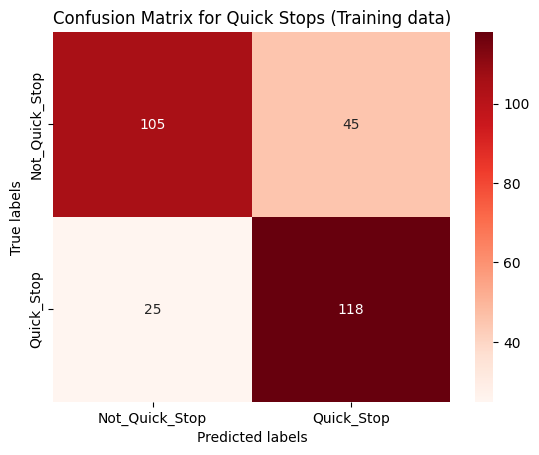

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                               
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt='.0f', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Quick Stops (Training data)')
ax.xaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']); ax.yaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']);

In [31]:
y_pred_proba = LR.predict_proba(x_test)   # Get the probability of LR classification 
                                          
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

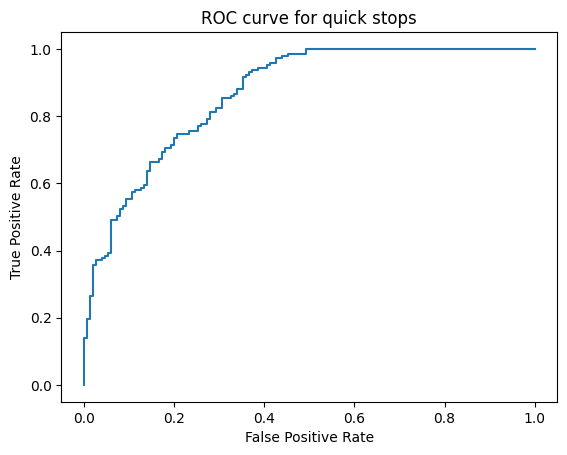

In [32]:
# Plot roc curve 
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for quick stops')
plt.plot(false_positive_rate, true_positive_rate)  


In [33]:
# Compute AUC
auc = metrics.auc(false_positive_rate, true_positive_rate)   # metrics also provide the auc area
print("AUC for quick stops (LR) =", auc)

AUC for quick stops (LR) = 0.8674592074592073


### Saving model

In [34]:
import pickle

In [35]:
pickle.dump(LR, open('quick_ss2.pkl', 'wb'))

In [36]:
pickle.dump(scaler, open('scaler_ss.pkl','wb'))

### Load new data for validation

In [37]:
# reading file from 10/06 dataset
df7 = pd.read_csv('SimData_2022.10.06_09.47.22.csv.roar.csv',
               parse_dates = {'datetime': ['date', 'time']},
               low_memory=False)
df7 = df_transformation(df7)

C:\Users\fariy\AppData\Local\Temp\ipykernel_8572\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [38]:
# Dataframe labeling for Quick Stops 
dfqs = df7.copy()
dfqs['Quick_Stop'] = 0

dfqs.loc[(dfqs['datetime'].between('2022-10-06 13:51:10' , '2022-10-06 13:51:42' , inclusive='both')),['Quick_Stop']] = 1
dfqs.loc[(dfqs['datetime'].between('2022-10-06 14:04:58' , '2022-10-06 14:05:25' , inclusive='both')),['Quick_Stop']] = 1
dfqs.loc[(dfqs['datetime'].between('2022-10-06 14:06:00' , '2022-10-06 14:06:20' , inclusive='both')),['Quick_Stop']] = 1
dfqs.loc[(dfqs['datetime'].between('2022-10-06 14:08:02' , '2022-10-06 14:08:26' , inclusive='both')),['Quick_Stop']] = 1

In [39]:
dfqs['Quick_Stop'].value_counts()

0    1160
1     107
Name: Quick_Stop, dtype: int64

In [40]:
# Split the data into X and y
X = dfqs[model_features]   
Y = dfqs['Quick_Stop']

### Load pickle

In [41]:
LR_loaded = pickle.load(open('quick_ss2.pkl', 'rb'))
scaler_loaded = pickle.load(open('scaler_ss.pkl','rb'))

In [42]:
# LR

x_valid = scaler_loaded.transform(X)


In [43]:
validation_LR = LR_loaded.predict(x_valid)
print("Accuracy of Model::",accuracy_score(Y,validation_LR))

Accuracy of Model:: 0.6527229676400947


In [44]:
y_pred_LR = LR.predict(x_valid)

LR8_accuracy = metrics.accuracy_score(y_pred_LR,Y)
print('Quick Stop accuracy (validation) = ', LR8_accuracy)
print('Recall = ',metrics.recall_score(Y, y_pred_LR))
print('Precision = ',metrics.precision_score(Y, y_pred_LR))

Quick Stop accuracy (validation) =  0.6527229676400947
Recall =  0.7663551401869159
Precision =  0.16498993963782696


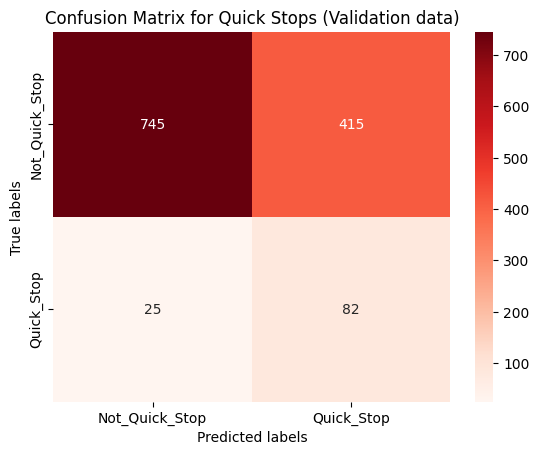

In [45]:
CM = metrics.confusion_matrix(Y, y_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                             
AX= plt.subplot()
sns.heatmap(CM, annot=True, cmap = 'Reds', fmt='.0f', ax=AX); 

# labels, title and ticks
AX.set_xlabel('Predicted labels');AX.set_ylabel('True labels'); 
AX.set_title('Confusion Matrix for Quick Stops (Validation data)')
AX.xaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']); AX.yaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']);

# SURFACE TAXIS USING 70% DATA FROM 9/19, 9/20, 9/22, 10/6 TO TRAIN AND 10/27 TO VALIDATE 

In [46]:
# Dataframe labeling for Surface Taxis
df_surface = pd.concat([df1, df2, df3, df4, df5, df6, df7]).reset_index()
df_surface['Surface_Taxi'] = 0

df_surface.loc[(df_surface['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-20 20:25:40' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-06 13:52:16' , '2022-10-06 13:56:00' , inclusive='both')),['Surface_Taxi']] = 1


In [47]:
df_surface['Surface_Taxi'].value_counts()

0    7615
1     872
Name: Surface_Taxi, dtype: int64

In [48]:
x2 = df_surface[model_features]
y2 = df_surface['Surface_Taxi']

In [49]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 100)

In [50]:
#LR standard 
scaler2 = StandardScaler()
x2_train = scaler2.fit_transform(x2_train)
x2_test = scaler2.transform(x2_test)

LR2 = LogisticRegression()    # Bring empty logistic regression model
LR2.fit(x2_train,y2_train)      # Train the model with training data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR2.score(x2_train, y2_train)))
print('Accuracy of LR classifier on test set: {:.4f}'
     .format(LR2.score(x2_test, y2_test)))

Accuracy of LR classifier on training set: 0.96
Accuracy of LR classifier on test set: 0.9654


In [51]:
y2_pred_LR = LR2.predict(x2_test)    # Get predicted y from the logistic regression model

In [52]:
# Get the classification accuracy, Recall, and Precision with the metrics function.
LR2_accuracy = metrics.accuracy_score(y2_pred_LR,y2_test)
print('Classification accuracy = ',LR2_accuracy)
print('Recall = ',metrics.recall_score(y2_test, y2_pred_LR))
print('Precision = ',metrics.precision_score(y2_test, y2_pred_LR))

Classification accuracy =  0.9654495484884178
Recall =  0.8772563176895307
Precision =  0.8181818181818182


In [53]:
# Check the train data

total = 0
Surface_Taxi = 0
non_Surface_Taxi = 0
for i in y2_train:
    if i == 1:
        Surface_Taxi += 1
    else:
        non_Surface_Taxi += 1
    total += 1

In [54]:
print(Surface_Taxi)
print(non_Surface_Taxi)
print(round(non_Surface_Taxi/total,2))

595
5345
0.9


Create a balanced dataset & train Logistic regression

In [55]:
df_surface_train = df_surface[df_surface['Surface_Taxi']==1]           # The original rows that have label 1
non_df_surface_train = df_surface[df_surface['Surface_Taxi']==0]       # The original rows that have label 0

In [56]:
print(len(df_surface_train))
print(len(non_df_surface_train))

872
7615


In [57]:
sampled_non_df_surface = non_df_surface_train.sample(n = 872)    # Sample 872 data points from the surface taxi data

In [58]:
print(len(df_surface_train))
print(len(sampled_non_df_surface))

872
872


In [59]:
merged2 = pd.concat([df_surface_train, sampled_non_df_surface])     # After balancing, concatenating both classes into 1 dataframe

In [60]:
print(len(merged2))

1744


In [61]:
merged2

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Surface_Taxi
2758,123,2022-09-19 21:53:50,39.872826,-75.234782,0.232708,259.489000,247.440354,0.682083,0.684220,-1.061208,...,1.0,0.008646,-20.697396,-4.869979,32.787938,11.191542,42.742437,31.345979,31.345979,1
2759,124,2022-09-19 21:53:51,39.872824,-75.234788,0.245306,259.937388,247.888714,1.485755,1.485781,-1.190224,...,1.0,0.283837,-24.496102,-0.463061,33.563122,11.287429,45.236265,36.912918,36.912918,1
2760,125,2022-09-19 21:53:52,39.872820,-75.234799,0.243750,260.249188,248.200521,2.323854,2.323846,-1.215479,...,1.0,0.324771,-23.142354,-0.877667,33.575000,11.824292,44.872375,37.355271,37.355271,1
2761,126,2022-09-19 21:53:53,39.872816,-75.234814,0.255102,260.700082,248.651551,2.799245,2.799233,-1.244388,...,1.0,0.357286,-22.971490,-1.427184,33.575000,12.283143,43.904286,35.235449,35.235449,1
2762,127,2022-09-19 21:53:54,39.872811,-75.234831,0.254286,261.131612,249.083061,3.203041,3.203053,-1.211551,...,1.0,0.359000,-22.986388,-1.904898,33.575000,12.019673,43.528714,34.235020,34.235020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,939,2022-10-06 14:04:41,39.451187,-74.584183,18.707556,34.649422,22.359444,44.980067,44.981227,-4.413089,...,0.0,0.647156,-14.553444,-6.894089,40.657044,-15.074778,53.440444,57.235511,57.235511,0
6105,972,2022-09-22 21:31:07,20.889526,-156.435471,144.318049,281.050610,290.531415,49.736659,50.180172,-4.072317,...,0.0,1.029098,-19.689780,-10.135220,47.254610,-14.135390,58.123805,66.842561,66.842561,0
6953,1820,2022-09-22 21:45:15,20.889808,-156.433466,14.693243,179.859324,189.340324,19.699541,19.701550,5.587649,...,0.0,-0.891189,-13.757784,-9.274324,41.215378,-12.310757,52.097568,52.185378,52.185378,0
1113,1113,2022-09-19 20:30:15,39.407346,-74.422005,1854.179000,268.887680,256.534560,130.260620,130.305812,-1.933200,...,0.0,1.296800,-39.770860,3.682000,45.716000,-2.128420,68.118120,83.809800,83.809800,0


In [62]:
# Split the data into X and y
x2 = merged2[model_features]   
y2 = merged2['Surface_Taxi']

In [63]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [64]:
total = 0
Surface_Taxi = 0
non_Surface_Taxi = 0
for i in y2_train:
    if i == 1:
        Surface_Taxi += 1
    else:
        non_Surface_Taxi += 1
    total += 1
    
print(Surface_Taxi)
print(non_Surface_Taxi)
print(non_Surface_Taxi/total)

608
612
0.5016393442622951


In [65]:
#LR standardizing 
scaler2 = StandardScaler()
x2_train = scaler2.fit_transform(x2_train)
x2_test = scaler2.transform(x2_test)



LR2 = LogisticRegression()    # Bring empty logistic regression model
LR2.fit(x2_train,y2_train)    # Train the model with training data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR2.score(x2_train, y2_train)))
print('Accuracy of LR classifier on test set: {:.4f}'
     .format(LR2.score(x2_test, y2_test)))

Accuracy of LR classifier on training set: 0.94
Accuracy of LR classifier on test set: 0.9275


In [66]:
qsy2_pred_LR = LR2.predict(x2_train)

qs2LR_accuracy = metrics.accuracy_score(qsy2_pred_LR,y2_train)
print('Surface Taxi accuracy (train) = ', qs2LR_accuracy)
print('Recall = ',metrics.recall_score(y2_train, qsy2_pred_LR))
print('Precision = ',metrics.precision_score(y2_train, qsy2_pred_LR))

Surface Taxi accuracy (train) =  0.9434426229508197
Recall =  0.9259868421052632
Precision =  0.959114139693356


In [67]:
y2_pred_LR = LR2.predict(x2_test)

LR2_accuracy = metrics.accuracy_score(y2_pred_LR,y2_test)
print('Surface Taxi accuracy (test) = ', LR2_accuracy)
print('Recall = ',metrics.recall_score(y2_test, y2_pred_LR))
print('Precision = ',metrics.precision_score(y2_test, y2_pred_LR))


Surface Taxi accuracy (test) =  0.9274809160305344
Recall =  0.928030303030303
Precision =  0.928030303030303


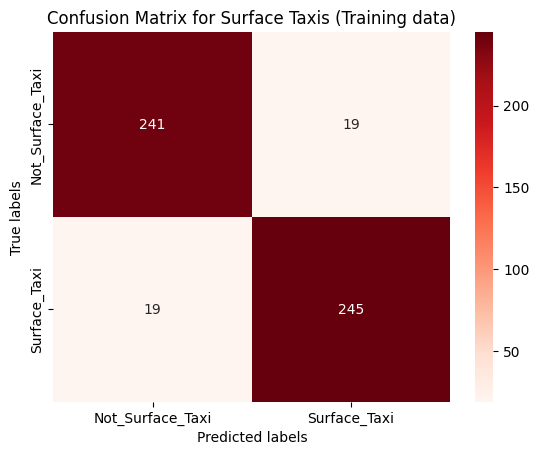

In [68]:
cm2 = metrics.confusion_matrix(y2_test, y2_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                               
ax2= plt.subplot()
sns.heatmap(cm2, annot=True, cmap = 'Reds', fmt='.0f', ax=ax2);  

# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix for Surface Taxis (Training data)')
ax2.xaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']); ax2.yaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']);

In [69]:
y2_pred_proba = LR2.predict_proba(x2_test)   # Get the probability of LR classification 
                                          
false_positive_rate2, true_positive_rate2, thresholds2 = metrics.roc_curve(y2_test, y2_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

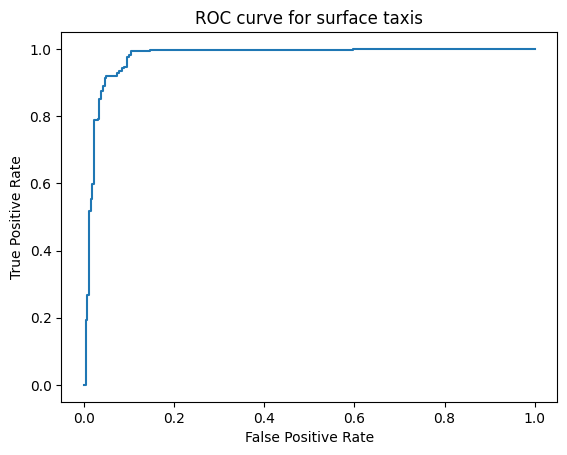

In [70]:
# Plot ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for surface taxis')
plt.plot(false_positive_rate2, true_positive_rate2)  


In [71]:
# Compute AUC
auc2 = metrics.auc(false_positive_rate2, true_positive_rate2)   # metrics also provide the auc area
print("AUC for surface taxis (LR) =", auc2)

AUC for surface taxis (LR) = 0.9754662004662005


### Saving Model

In [72]:
pickle.dump(LR2, open('surface_ss2.pkl', 'wb'))

In [73]:
pickle.dump(scaler2, open('scaler2_ss.pkl','wb'))

### Load new data for validation 

In [74]:
# reading files from 10/27 dataset
df9 = pd.read_csv('SimData_2022.10.27_17.55.06.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df9 = df_transformation(df9)

C:\Users\fariy\AppData\Local\Temp\ipykernel_8572\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [75]:
df9['Surface_Taxi'] = 0

df9.loc[(df9['datetime'].between('2022-10-27 21:57:45' , '2022-10-27 21:59:45' , inclusive='both')),['Surface_Taxi']] = 1
df9.loc[(df9['datetime'].between('2022-10-27 22:00:30' , '2022-10-27 22:04:55' , inclusive='both')),['Surface_Taxi']] = 1
df9.loc[(df9['datetime'].between('2022-10-27 22:06:00' , '2022-10-27 22:07:59' , inclusive='both')),['Surface_Taxi']] = 1
df9.loc[(df9['datetime'].between('2022-10-27 22:09:03' , '2022-10-27 22:11:12' , inclusive='both')),['Surface_Taxi']] = 1
df9.loc[(df9['datetime'].between('2022-10-27 22:13:30' , '2022-10-27 22:17:58' , inclusive='both')),['Surface_Taxi']] = 1

In [76]:
# Split the data into X and y
X2 = df9[model_features]   
Y2 = df9['Surface_Taxi']

### Load pickle

In [77]:
LR2_loaded = pickle.load(open('surface_ss2.pkl', 'rb'))
scaler2_loaded = pickle.load(open('scaler2_ss.pkl','rb'))

In [78]:
# LR

x2_valid = scaler2_loaded.transform(X2)


In [79]:
validation2_LR = LR2_loaded.predict(x2_valid)
print("Accuracy of Model::",accuracy_score(Y2,validation2_LR))

Accuracy of Model:: 0.9696541990119972


In [80]:
y2_pred_LR = LR2.predict(x2_valid)

LR9_accuracy = metrics.accuracy_score(y2_pred_LR,Y2)
print('Surface Taxi accuracy (validation) = ', LR9_accuracy)
print('Recall = ',metrics.recall_score(Y2, y2_pred_LR))
print('Precision = ',metrics.precision_score(Y2, y2_pred_LR))

Surface Taxi accuracy (validation) =  0.9696541990119972
Recall =  0.9823399558498896
Precision =  0.9705561613958561


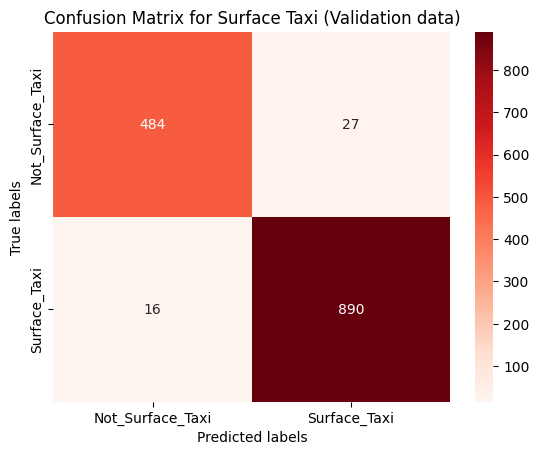

In [81]:
CM2 = metrics.confusion_matrix(Y2, y2_pred_LR)    # Create a confusion matrix from predicted y and original y value.
            
AX2= plt.subplot()
sns.heatmap(CM2, annot=True, cmap = 'Reds', fmt='.0f', ax=AX2); 

# labels, title and ticks
AX2.set_xlabel('Predicted labels');AX2.set_ylabel('True labels'); 
AX2.set_title('Confusion Matrix for Surface Taxi (Validation data)')
AX2.xaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']); AX2.yaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']);

# HOVER TAXIS USING 70% DATA FROM 9/19, 9/20, 9/22, 10/6 TO TRAIN AND 10/20 TO VALIDATE

In [82]:
# Dataframe labeling for Hover Taxis
df_h = pd.concat([df1, df2, df3, df4, df5, df6, df7]).reset_index()
df_h['hover'] = 0

df_h.loc[(df_h['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-06 13:56:43' , '2022-10-06 14:00:40' , inclusive='both')),['hover']] = 1


In [83]:
df_h['hover'].value_counts()

0    7235
1    1252
Name: hover, dtype: int64

In [84]:
X3 = df_h[model_features]
y3 = df_h['hover']

In [85]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 100)

In [86]:
#LR standard 
scaler3 = StandardScaler()
x3_train = scaler3.fit_transform(x3_train)
x3_test = scaler3.transform(x3_test)

LR3 = LogisticRegression()    # Bring empty logistic regression model
LR3.fit(x3_train,y3_train)      # Train the model with training data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR3.score(x3_train, y3_train)))
print('Accuracy of LR classifier on test set: {:.4f}'
     .format(LR3.score(x3_test, y3_test)))

Accuracy of LR classifier on training set: 0.90
Accuracy of LR classifier on test set: 0.8869


In [87]:
y3_pred_LR = LR3.predict(x3_test)    # Get predicted y from the logistic regression model

In [88]:
# Get the classification accuracy, Recall, and Precision with the metrics function.
LR3_accuracy = metrics.accuracy_score(y3_pred_LR,y3_test)
print('Classification accuracy = ',LR3_accuracy)
print('Recall = ',metrics.recall_score(y3_test, y3_pred_LR))
print('Precision = ',metrics.precision_score(y3_test, y3_pred_LR))

Classification accuracy =  0.8869257950530035
Recall =  0.45569620253164556
Precision =  0.7114624505928854


In [89]:
# Check the train data

total = 0
h = 0
non_h = 0
for i in y3_train:
    if i == 1:
        h += 1
    else:
        non_h += 1
    total += 1

In [90]:
print(h)
print(non_h)
print(round(non_h/total,2))

857
5083
0.86


Create a balanced dataset & train Logistic regression

In [91]:
df_h_train = df_h[df_h['hover']==1]           # The original rows that have label 1
non_df_h_train = df_h[df_h['hover']==0]       # The original rows that have label 0

In [92]:
print(len(df_h_train))
print(len(non_df_h_train))

1252
7235


In [93]:
sampled_non_df_h = non_df_h_train.sample(n = 1252)    # Sample 1252 data points from the hover taxi data

In [94]:
print(len(df_h_train))
print(len(sampled_non_df_h))

1252
1252


In [95]:
merged3 = pd.concat([df_h_train, sampled_non_df_h])     # After balancing, concatenating  both classes into 1 dataframe

In [96]:
print(len(merged3))

2504


In [97]:
merged3

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
2955,320,2022-09-19 21:57:07,39.872003,-75.244645,3.048627,254.362216,242.319608,5.605137,5.609278,3.657137,...,0.0,-0.442196,-4.921765,-1.968549,42.530020,-7.193882,52.264863,52.443392,52.443392,1
2956,321,2022-09-19 21:57:08,39.871999,-75.244679,3.037708,254.180958,242.138375,5.810917,5.811935,4.162687,...,0.0,-0.323062,-6.295167,-1.465167,42.635708,-3.533979,52.550687,53.252729,53.252729,1
2957,322,2022-09-19 21:57:09,39.871991,-75.244714,3.308431,254.661020,242.618333,6.050529,6.053990,4.328373,...,0.0,0.065843,-6.191294,-0.783667,42.660000,-2.734980,52.451216,53.174941,53.174941,1
2958,323,2022-09-19 21:57:10,39.871981,-75.244749,3.645294,255.137765,243.095275,6.369373,6.372433,4.275510,...,0.0,0.341706,-6.662549,1.319098,42.664294,-1.857176,52.303235,52.797627,52.797627,1
2959,324,2022-09-19 21:57:11,39.871969,-75.244787,3.964400,256.115300,244.072780,6.803520,6.806314,4.166440,...,0.0,1.034800,-6.927800,1.604640,42.654960,-0.870780,52.173660,52.451680,52.451680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,802,2022-09-19 22:05:09,39.864644,-75.255772,0.882791,61.214767,49.180047,10.016372,10.016397,-1.459674,...,0.0,3.000000,2.245047,-0.371907,36.697860,12.539791,46.546233,40.240605,40.240605,0
3125,490,2022-09-19 21:59:57,39.869750,-75.256070,0.060000,259.960000,247.925000,0.000000,0.000000,-0.004784,...,1.0,-0.001000,12.845667,7.716824,4.049000,-3.374000,43.881510,34.930059,34.930059,0
4141,189,2022-09-20 20:25:16,39.450932,-74.567194,17.120526,117.231289,104.933895,28.562711,28.724700,7.442211,...,0.0,0.473763,-9.686737,-12.696368,35.067974,-3.308553,48.568579,44.789842,44.789842,0
5896,763,2022-09-22 21:27:38,20.893964,-156.431365,151.804062,185.972687,195.454250,53.976094,54.025135,4.004750,...,0.0,-1.024438,-11.396500,-1.275312,31.362188,-11.479781,43.705687,33.701500,33.701500,0


In [98]:
# Split the data into X and y
x3 = merged3[model_features]   
y3 = merged3['hover']

In [99]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 0)

In [100]:
total = 0
h = 0
non_h = 0
for i in y3_train:
    if i == 1:
        h += 1
    else:
        non_h += 1
    total += 1
    
print(h)
print(non_h)
print(non_h/total)

880
872
0.4977168949771689


In [101]:
#LR standardizing 
scaler3 = StandardScaler()
x3_train = scaler3.fit_transform(x3_train)
x3_test = scaler3.transform(x3_test)



LR3 = LogisticRegression()    # Bring empty logistic regression model
LR3.fit(x3_train,y3_train)                  # Train the model with all data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR3.score(x3_train, y3_train)))
print('Accuracy of LR classifier on test set: {:.4f}'
     .format(LR3.score(x3_test, y3_test)))


Accuracy of LR classifier on training set: 0.85
Accuracy of LR classifier on test set: 0.8497


In [102]:
sty3_pred_LR = LR3.predict(x3_train)

stLR3_accuracy = metrics.accuracy_score(sty3_pred_LR,y3_train)
print('Hover Taxi Accuracy (train) = ',stLR3_accuracy)
print('Recall = ',metrics.recall_score(y3_train, sty3_pred_LR))
print('Precision = ',metrics.precision_score(y3_train, sty3_pred_LR))

Hover Taxi Accuracy (train) =  0.8476027397260274
Recall =  0.9306818181818182
Precision =  0.7990243902439025


In [103]:
y3_pred_LR = LR3.predict(x3_test)

LR3_accuracy = metrics.accuracy_score(y3_pred_LR,y3_test)
print('Hover Taxi Accuracy (test) = ',LR3_accuracy)
print('Recall = ',metrics.recall_score(y3_test, y3_pred_LR))
print('Precision = ',metrics.precision_score(y3_test, y3_pred_LR))

Hover Taxi Accuracy (test) =  0.8497340425531915
Recall =  0.9408602150537635
Precision =  0.7936507936507936


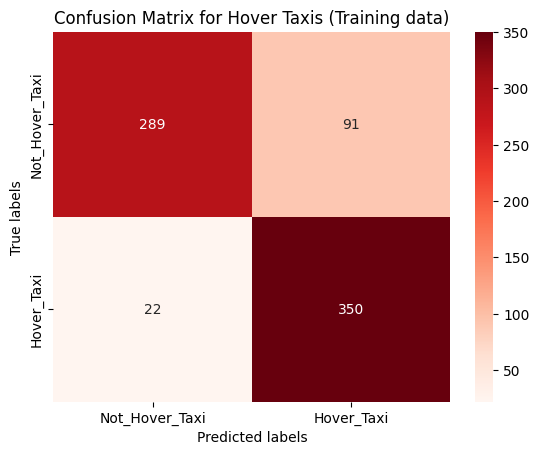

In [104]:
cm3 = metrics.confusion_matrix(y3_test, y3_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    
ax3= plt.subplot()
sns.heatmap(cm3, annot=True, cmap = 'Reds', fmt='.0f', ax=ax3);  
# labels, title and ticks
ax3.set_xlabel('Predicted labels');ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix for Hover Taxis (Training data)')
ax3.xaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']); ax3.yaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']);

In [105]:
y3_pred_proba = LR3.predict_proba(x3_test)   # Get the probability of LR classification (replace with other classifier results as needed)
                                          
false_positive_rate3, true_positive_rate3, thresholds3 = metrics.roc_curve(y3_test, y3_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

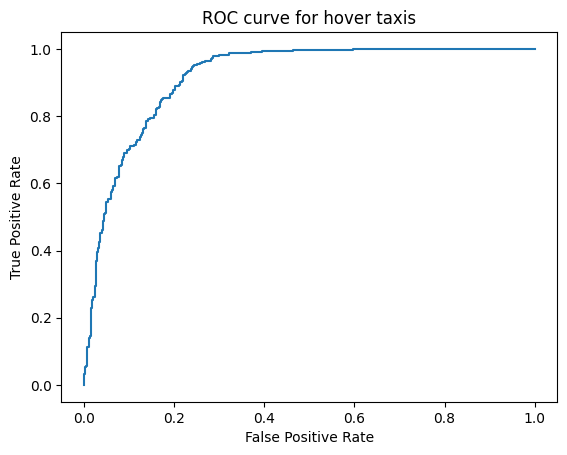

In [106]:
# Plot ROC curve 
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for hover taxis')
plt.plot(false_positive_rate3, true_positive_rate3)  


In [107]:
# Compute AUC
auc3 = metrics.auc(false_positive_rate3, true_positive_rate3)   # metrics also provide the auc area
print("AUC curve for hover taxis (LR) =", auc3)

AUC curve for hover taxis (LR) = 0.9174872665534806


### Saving Model

In [108]:
pickle.dump(LR3, open('hover_ss2.pkl', 'wb'))

In [109]:
pickle.dump(scaler3, open('scaler3_ss.pkl','wb'))

### Load new data for validation

In [110]:
# reading files from 10/20 dataset
dfhover = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
dfhover = df_transformation(dfhover)

C:\Users\fariy\AppData\Local\Temp\ipykernel_8572\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [111]:
dfhover['hover'] = 0

dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['hover']] = 1
dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['hover']] = 1
dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['hover']] = 1
dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['hover']] = 1


In [112]:
# Split the data into X and y
X3 = dfhover[model_features]   
Y3 = dfhover['hover']

### Load pickle

In [113]:
LR3_loaded = pickle.load(open('hover_ss2.pkl', 'rb'))
scaler3_loaded = pickle.load(open('scaler3_ss.pkl','rb'))

In [114]:
# LR

x3_valid = scaler3_loaded.transform(X3)

In [115]:
validation3_LR = LR3_loaded.predict(x3_valid)
print("Accuracy of Model::",accuracy_score(Y3,validation3_LR))

Accuracy of Model:: 0.8526187576126675


In [116]:
y3_pred_LR = LR3.predict(x3_valid)

LR10_accuracy = metrics.accuracy_score(y3_pred_LR,Y3)
print('Hover Taxi accuracy (validation) = ', LR10_accuracy)
print('Recall = ',metrics.recall_score(Y3, y3_pred_LR))
print('Precision = ',metrics.precision_score(Y3, y3_pred_LR))

Hover Taxi accuracy (validation) =  0.8526187576126675
Recall =  0.9884393063583815
Precision =  0.65832531280077


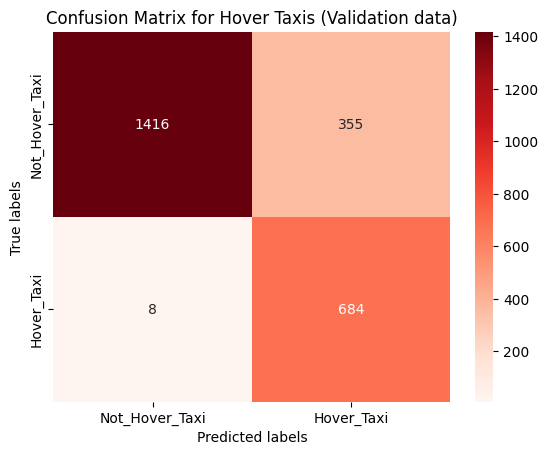

In [117]:
CM3 = metrics.confusion_matrix(Y3, y3_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                                
AX3= plt.subplot()
sns.heatmap(CM3, annot=True, cmap = 'Reds', fmt='.0f', ax=AX3); 

# labels, title and ticks
AX3.set_xlabel('Predicted labels');AX3.set_ylabel('True labels'); 
AX3.set_title('Confusion Matrix for Hover Taxis (Validation data)')
AX3.xaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']); AX3.yaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']);